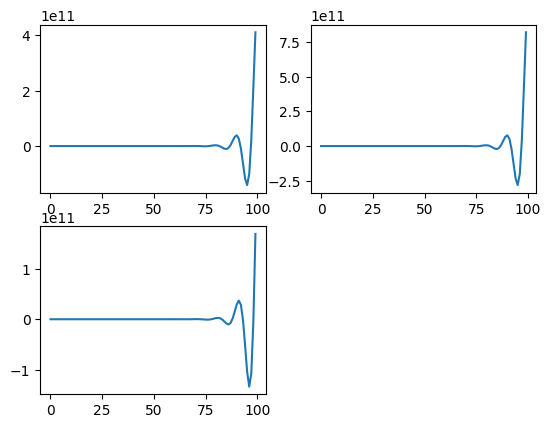

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# System setup
A = np.mat('1.95, -0.025, -1.6; 1.6, 1.1, -3.2; 0.425, 0.1875, 0.2')
B = np.mat('0 1 0; 1 1 1').T

nu = 2  # number of inputs
nx = 3  # number of states

# Simulate the original system without control (open loop)
N = 100  # number of discrete time steps

x = np.mat(np.zeros((nx, N)))  # Initialize state matrix to store all states
x[:, 0] = np.array([[1], [2], [3]])  # Assign the initial state

for k in np.arange(N-1):
    x[:, k+1] = A @ x[:, k]

time = np.arange(N)

# Plot trajectories of each state
plt.subplot(2, 2, 1)
plt.plot(time, x[0, :].T)
plt.subplot(2, 2, 2)
plt.plot(time, x[1, :].T)
plt.subplot(2, 2, 3)
plt.plot(time, x[2, :].T)
plt.show()


In [35]:
# Design the LQR controller 

Q = np.eye(3) # state weighting matrix
R = np.eye(2)       # control weighting matirx

Nr = 200

P = np.zeros((nx,nx,Nr)) # 存放每一步的 P 矩阵
P[:,:,0] = np.zeros((3,3))

for j in np.arange(Nr-1):
    P[:,:,j+1]= Q + A.T@P[:,:,j]@A -A.T@P[:,:,j]@B@la.inv(R+B.T@P[:,:,j]@B)@B.T@P[:,:,j]@A

# check the P matix in the last two step, 他们应该很接近
# print(P[:,:,198]) 
# print(P[:,:,199]) 


[[ 58.09750899  -9.20018802 -66.64000545]
 [ -9.20018802   3.35985278   9.4380331 ]
 [-66.64000545   9.4380331   81.7183087 ]]
[[ 58.09750899  -9.20018802 -66.64000545]
 [ -9.20018802   3.35985278   9.4380331 ]
 [-66.64000545   9.4380331   81.7183087 ]]
